#  Data Science Solution for hotel review sentiment

In [ ]:
`!pip install folium
!pip install tqdm
!pip install numpy
!pip install pandas
!pip install nltk
!pip install scikit-learn
!pip install scipy
!pip install geopy
!pip install tabulate
!pip install textblob
!pip install spacy
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

In [ ]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

## Geolocation
import geopy
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim

from geopy.extra.rate_limiter import RateLimiter

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth','timeStamp','Address','city','Province','ZipCode']
hotelDf = pd.read_csv('/content/reviews.csv',header = None, names = columnNames)
hotelDf

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,timeStamp,Address,city,Province,ZipCode
0,C:\Users\zhang\Documents\ds assignment\assignm...,Cedar Lodge Motel,"""Nice place located downtown and close to all ...",3,negative,"March 29, 2011",157 Huron Rd,"('Goderich',)",Ontario,N7A 2Z7
1,C:\Users\zhang\Documents\ds assignment\assignm...,Cedar Lodge Motel,"""I thoroughly enjoy the pool the exercise room...",4,positive,"May 26, 2011",157 Huron Rd,"('Goderich',)",Ontario,N7A 2Z7
2,C:\Users\zhang\Documents\ds assignment\assignm...,Cedar Lodge Motel,"""we really like the price n service ,nice pool...",5,positive,"June 3, 2011",157 Huron Rd,"('Goderich',)",Ontario,N7A 2Z7
3,C:\Users\zhang\Documents\ds assignment\assignm...,Cedar Lodge Motel,"""We have stayed here before. The place was com...",4,positive,"June 6, 2011",157 Huron Rd,"('Goderich',)",Ontario,N7A 2Z7
4,C:\Users\zhang\Documents\ds assignment\assignm...,Cedar Lodge Motel,"""Extremely reasonable price and respectable ro...",4,positive,"July 6, 2011",157 Huron Rd,"('Goderich',)",Ontario,N7A 2Z7
...,...,...,...,...,...,...,...,...,...,...
1559,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""This motel is beautifully maintained, and all...",5,positive,"August 9, 2022",79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8
1560,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""We stayed as couple for a few days. Rooms are...",5,positive,"August 13, 2022",79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8
1561,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""Excellent customer service, spotless clean ro...",5,positive,"September 7, 2022",79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8
1562,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""Lovely, quiet room in a secure inn. The beds...",5,positive,3 weeks ago,79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8


In [ ]:
#Extract a list of hotels
# this of course may need to be filtered 
hotelNames = hotelDf['hotelName'].unique()
hotelNames

array(['Cedar Lodge Motel', 'Harmony Inn', 'Colborne Bed and Breakfast',
       'Comfort Inn &amp; Suites', 'Samuels Boutique Hotel',
       'Hotel Bedford', 'Maple Leaf Motel', 'Silver Birch Motel',
       'Dreamz Inn'], dtype=object)

In [ ]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [ ]:
reviews = hotelDf['reviewColumn'].values

In [ ]:
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 1564/1564 [00:02<00:00, 747.38it/s]


In [ ]:
reviewDF.head()

,reviewCol,vader
0,"""Nice place located downtown and close to all ...",0.8257
1,"""I thoroughly enjoy the pool the exercise room...",0.7577
2,"""we really like the price n service ,nice pool...",0.9216
3,"""We have stayed here before. The place was com...",0.9646
4,"""Extremely reasonable price and respectable ro...",0.6239


In [ ]:
def get_stop_words():
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    return stop

def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [ ]:
topk = getTopKWords(reviewDF, 500)
finaldf = dataFrameTransformation(hotelDf, reviewDF, topk)

In [ ]:
def avg_rating_per_hotel(df):
  # average the scores over all hotels, you may need to provide additional filtering
  tempDf = df[['hotelName','vader','ratingScore','reviewCol']]
  tempDf.columns = ['hotelName','AverageVader', 'AverageRatingScore','n_reviews']
  tempDf = tempDf.groupby('hotelName').agg({'AverageVader':'mean', 'AverageRatingScore':'mean','n_reviews':'count'})
  return tempDf

In [ ]:
avg_rating_df = avg_rating_per_hotel(finaldf)
avg_rating_df.head()

,AverageVader,AverageRatingScore,n_reviews
hotelName,,,
Cedar Lodge Motel,0.814863,4.277628,371
Colborne Bed and Breakfast,0.957575,4.929487,156
Comfort Inn &amp; Suites,0.450048,3.517241,29
Dreamz Inn,0.927355,4.797153,281
Harmony Inn,0.616567,3.489796,98


In [ ]:
avgRatingTop5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName','AverageRatingScore']].head(5)
avgRatingBottom5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=True)[['hotelName','AverageRatingScore']].head(5)
print(avgRatingTop5)
print(avgRatingBottom5)


                    hotelName  AverageRatingScore
1  Colborne Bed and Breakfast            4.929487
3                  Dreamz Inn            4.797153
6            Maple Leaf Motel            4.793893
7      Samuels Boutique Hotel            4.606880
0           Cedar Lodge Motel            4.277628
                  hotelName  AverageRatingScore
8        Silver Birch Motel            3.000000
4               Harmony Inn            3.489796
2  Comfort Inn &amp; Suites            3.517241
5             Hotel Bedford            3.554054
0         Cedar Lodge Motel            4.277628


In [ ]:
avgVaderTop5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=False)[['hotelName','AverageVader']].head(5)
avgVaderBottom5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=True)[['hotelName','AverageVader']].head(5)
print

<function print>

In [ ]:
print(avgRatingTop5)
print(avgVaderTop5)
print(avgRatingBottom5)
print(avgVaderBottom5)

                    hotelName  AverageRatingScore
1  Colborne Bed and Breakfast            4.929487
3                  Dreamz Inn            4.797153
6            Maple Leaf Motel            4.793893
7      Samuels Boutique Hotel            4.606880
0           Cedar Lodge Motel            4.277628
                    hotelName  AverageVader
1  Colborne Bed and Breakfast      0.957575
3                  Dreamz Inn      0.927355
6            Maple Leaf Motel      0.890760
7      Samuels Boutique Hotel      0.875792
0           Cedar Lodge Motel      0.814863
                  hotelName  AverageRatingScore
8        Silver Birch Motel            3.000000
4               Harmony Inn            3.489796
2  Comfort Inn &amp; Suites            3.517241
5             Hotel Bedford            3.554054
0         Cedar Lodge Motel            4.277628
                  hotelName  AverageVader
2  Comfort Inn &amp; Suites      0.450048
8        Silver Birch Motel      0.493282
4               Harmon

b)

In [ ]:
# sometimes its helpful to make the results cleaner to read 
print('Top 5 hotels avg rating vs. avg vader score:')

table = [[i,x,avgVaderTop5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingTop5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Top 5 hotels avg rating vs. avg vader score:
+--------+----------------------------+----------------------------+
|   Rank | avg Rating                 | avg Vader                  |
+========+============================+============================+
|      0 | Colborne Bed and Breakfast | Colborne Bed and Breakfast |
+--------+----------------------------+----------------------------+
|      1 | Dreamz Inn                 | Dreamz Inn                 |
+--------+----------------------------+----------------------------+
|      2 | Maple Leaf Motel           | Maple Leaf Motel           |
+--------+----------------------------+----------------------------+
|      3 | Samuels Boutique Hotel     | Samuels Boutique Hotel     |
+--------+----------------------------+----------------------------+
|      4 | Cedar Lodge Motel          | Cedar Lodge Motel          |
+--------+----------------------------+----------------------------+


In [ ]:
# sometimes its helpful to make the results cleaner to read 
print('Bottom 5 hotels avg rating vs. avg vader score:')

table = [[i,x,avgVaderBottom5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingBottom5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Bottom 5 hotels avg rating vs. avg vader score:
+--------+--------------------------+--------------------------+
|   Rank | avg Rating               | avg Vader                |
+========+==========================+==========================+
|      0 | Silver Birch Motel       | Comfort Inn &amp; Suites |
+--------+--------------------------+--------------------------+
|      1 | Harmony Inn              | Silver Birch Motel       |
+--------+--------------------------+--------------------------+
|      2 | Comfort Inn &amp; Suites | Harmony Inn              |
+--------+--------------------------+--------------------------+
|      3 | Hotel Bedford            | Hotel Bedford            |
+--------+--------------------------+--------------------------+
|      4 | Cedar Lodge Motel        | Cedar Lodge Motel        |
+--------+--------------------------+--------------------------+


for top 5 both methods return the same result
for bottom 5 comfort inn is ranked in 3third in avgRating and ranking first in avgVadar, this may be becasuse comfort inn has less review and most of them are negative, so the rating is much lower

# Frequency Analysis 

In [ ]:
def getTopK(df, kwords, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = get_stop_words()
    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]
    for review in reviews:
          counter.update([word.lower() 
                          for word 
                          in re.findall(r'\w+', review) 
                          if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [ ]:
#We are only intereseted in this three column for overall analysis
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader']]
itemAnalysisDf.head()

,reviewCol,groundTruth,vader
0,"""Nice place located downtown and close to all ...",negative,0.8257
1,"""I thoroughly enjoy the pool the exercise room...",positive,0.7577
2,"""we really like the price n service ,nice pool...",positive,0.9216
3,"""We have stayed here before. The place was com...",positive,0.9646
4,"""Extremely reasonable price and respectable ro...",positive,0.6239


In [ ]:
topkGroundPos = getTopK(itemAnalysisDf, 50, label_value='positive')
topkGroundPos

[('clean', 964),
 ('great', 687),
 ('goderich', 660),
 ('breakfast', 611),
 ('friendly', 517),
 ('would', 513),
 ('comfortable', 512),
 ('pool', 496),
 ('nice', 494),
 ('well', 467),
 ('motel', 455),
 ('stayed', 433),
 ('place', 414),
 ('area', 375),
 ('good', 346),
 ('bed', 314),
 ('back', 302),
 ('recommend', 287),
 ('town', 286),
 ('time', 285),
 ('definitely', 263),
 ('tub', 262),
 ('one', 262),
 ('night', 261),
 ('beautiful', 251),
 ('hot', 250),
 ('quiet', 234),
 ('also', 228),
 ('helpful', 227),
 ('lovely', 218),
 ('enjoyed', 216),
 ('nthe', 215),
 ('little', 212),
 ('small', 209),
 ('everything', 202),
 ('location', 196),
 ('excellent', 194),
 ('really', 193),
 ('wonderful', 191),
 ('beds', 189),
 ('fridge', 187),
 ('family', 180),
 ('inn', 178),
 ('visit', 176),
 ('service', 175),
 ('close', 170),
 ('coffee', 169),
 ('modern', 169),
 ('like', 163),
 ('home', 157)]

In [ ]:
topkGroundNeg = getTopK(itemAnalysisDf, 50, label_value='negative')
topkGroundNeg

[('would', 134),
 ('night', 94),
 ('clean', 90),
 ('one', 86),
 ('motel', 81),
 ('bathroom', 76),
 ('good', 73),
 ('could', 72),
 ('like', 69),
 ('nthe', 68),
 ('get', 67),
 ('nice', 57),
 ('goderich', 57),
 ('breakfast', 56),
 ('stayed', 56),
 ('place', 53),
 ('also', 52),
 ('bed', 52),
 ('small', 51),
 ('area', 49),
 ('desk', 47),
 ('shower', 46),
 ('front', 46),
 ('door', 46),
 ('time', 45),
 ('back', 43),
 ('friendly', 43),
 ('told', 40),
 ('u2019t', 40),
 ('comfortable', 38),
 ('day', 38),
 ('booked', 38),
 ('said', 37),
 ('floor', 37),
 ('well', 36),
 ('town', 36),
 ('made', 36),
 ('old', 35),
 ('service', 34),
 ('much', 34),
 ('pool', 34),
 ('even', 34),
 ('check', 33),
 ('location', 32),
 ('beds', 32),
 ('price', 32),
 ('little', 31),
 ('great', 30),
 ('lot', 30),
 ('water', 29)]

location specific: "breakfast", 'coffee','water','goderich'

words exist in both positive and negative: goderich, breakfast, bed, comfortable. these words exist in both because either they dont express the atitude with just the single words, or negation may be a problem



In [ ]:
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
# Create phrase tree
chunker = nltk.RegexpParser(grammar)
tagger = PerceptronTagger()
pos_tag = tagger.tag

# to make the results more useable, we clean up the tree results shown above. 
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):
      
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList
#def getTopKNP(df, kNPs):

#    counter = Counter()
#    reviews = df['reviewCol'].values

#    for review in reviews:
#            counter.update(flatten_phrase_lists([word
#                            for word 
#                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
#                            ]))
#    topk = counter.most_common(kNPs)
#    return topk

def getTopKNP(df, kNPs, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    counter = Counter()
    if label_value == None:
      reviews = df['reviewCol'].values
    else:
      reviews = df.loc[operation(df[label_column],label_value)][value_column]
    for review in reviews:
          counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk

def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
topk_phrase = getTopKNP(finaldf, 50,label_value='positive') 
topk_phrase

[('hot tub', 111),
 ('dreamz inn', 75),
 ('continent breakfast', 58),
 ('front desk', 56),
 ('cedar lodg', 49),
 ('cedar lodg motel', 39),
 ('mapl leaf motel', 39),
 ('great place', 38),
 ('coffe maker', 33),
 ('indoor pool', 32),
 ('next time', 28),
 ('goderich area', 28),
 ('maitland river', 28),
 ('comfort bed', 27),
 ('first time', 23),
 ('nice touch', 23),
 ('colborn bed', 21),
 ('town squar', 20),
 ('pool area', 20),
 ('park lot', 20),
 ('river view', 20),
 ('short drive', 18),
 ('separ build', 17),
 ('minut walk', 17),
 ('great locat', 17),
 ('next morn', 15),
 ('good valu', 14),
 ('fridg microwav', 14),
 ('great time', 14),
 ('lake huron', 14),
 ('jacuzzi tub', 13),
 ('next year', 13),
 ('beauti town', 12),
 ('common area', 12),
 ('harmoni inn', 12),
 ('front door', 12),
 ('minut drive', 12),
 ('salt water pool', 12),
 ('basketbal court', 12),
 ('reason price', 11),
 ('great servic', 11),
 ('conveni locat', 11),
 ('grand bend', 11),
 ('last minut', 11),
 ('super clean', 11),
 (

In [ ]:
topKNP_neg = getTopKNP(finaldf, 50,label_value='negative') 
topKNP_neg

[('front desk', 22),
 ('cedar lodg', 10),
 ('park lot', 9),
 ('air condition', 8),
 ('next day', 7),
 ('goderich area', 6),
 ('great locat', 6),
 ('harmoni inn', 6),
 ('continent breakfast', 6),
 ('next morn', 5),
 ('doubl bed', 5),
 ('coffe maker', 5),
 ('queen bed', 5),
 ('good thing', 4),
 ('hot tub', 4),
 ('extra charg', 4),
 ('comfort inn', 4),
 ('fresh towel', 4),
 ('air condit', 3),
 ('pool area', 3),
 ('short notic', 3),
 ('clean bathroom', 3),
 ('bad review', 3),
 ('indoor pool', 3),
 ('credit card', 3),
 ('good sleep', 3),
 ('plu side', 3),
 ('main squar', 3),
 ('earli check', 3),
 ('custom servic', 3),
 ('bathroom floor', 3),
 ('u2019t matter', 3),
 ('custom servic skill', 3),
 ('nthe bathroom', 3),
 ('nice place', 2),
 ('second time', 2),
 ('lake huron', 2),
 ('first day', 2),
 ('small frig', 2),
 ('second floor', 2),
 ('bath tub', 2),
 ('plastic bag', 2),
 ('small thing', 2),
 ('first night', 2),
 ('tini hook', 2),
 ('good place', 2),
 ('cedar lodg motel', 2),
 ('separ bui

Both in positive and negative: continent breakfast, coffe maker, next morn. some of them b/c common word that appear a lot

surprise noun phrase: maitland river. B/c indicate location and usually does not have sentiment. but since it is a location specific word, people like that area most likely

c)

In [ ]:
grammar = r"""
    NBAR:
        {<NN.*|JJ|RB>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
# Create phrase tree
chunker = nltk.RegexpParser(grammar)
tagger = PerceptronTagger()
pos_tag = tagger.tag

In [ ]:
def test_grammar(text):
    counter = Counter()

    for review in text:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    return counter

In [ ]:
text = ['sad strong women was', 'silently strongly crazy men eat']
test_grammar(text)

Counter({'sad strong woman': 1, 'silent strongli crazi men': 1})

In [ ]:
topk_phrase = getTopKNP(finaldf, 50,label_value='positive') 
topk_phrase

[('hot tub', 107),
 ('dreamz inn', 74),
 ('continent breakfast', 55),
 ('front desk', 52),
 ('cedar lodg', 48),
 ('cedar lodg motel', 39),
 ('mapl leaf motel', 39),
 ('great place', 36),
 ('coffe maker', 33),
 ('indoor pool', 32),
 ('next time', 27),
 ('goderich area', 27),
 ('maitland river', 27),
 ('first time', 23),
 ('comfort bed', 23),
 ('nice touch', 22),
 ('colborn bed', 21),
 ('town squar', 20),
 ('pool area', 20),
 ('park lot', 20),
 ('river view', 20),
 ('short drive', 18),
 ('minut walk', 17),
 ('separ build', 16),
 ('next morn', 15),
 ('great locat', 15),
 ('fridg microwav', 14),
 ('great time', 14),
 ('jacuzzi tub', 13),
 ('lake huron', 13),
 ('beauti town', 12),
 ('harmoni inn', 12),
 ('front door', 12),
 ('minut drive', 12),
 ('good valu', 11),
 ('conveni locat', 11),
 ('last minut', 11),
 ('common area', 11),
 ('small patio', 11),
 ('salt water pool', 11),
 ('basketbal court', 11),
 ('long day', 10),
 ('second floor', 10),
 ('ad bonu', 10),
 ('great experi', 10),
 ('fre

In [ ]:
topKNP_neg = getTopKNP(finaldf, 50,label_value='negative') 
topKNP_neg

[('front desk', 22),
 ('cedar lodg', 10),
 ('park lot', 9),
 ('air condition', 8),
 ('next day', 7),
 ('goderich area', 6),
 ('harmoni inn', 6),
 ('continent breakfast', 6),
 ('doubl bed', 5),
 ('coffe maker', 5),
 ('queen bed', 5),
 ('great locat', 5),
 ('next morn', 4),
 ('good thing', 4),
 ('hot tub', 4),
 ('extra charg', 4),
 ('comfort inn', 4),
 ('nthe bathroom', 4),
 ('fresh towel', 4),
 ('air condit', 3),
 ('pool area', 3),
 ('short notic', 3),
 ('clean bathroom', 3),
 ('indoor pool', 3),
 ('credit card', 3),
 ('plu side', 3),
 ('main squar', 3),
 ('earli check', 3),
 ('custom servic', 3),
 ('bathroom floor', 3),
 ('u2019t matter', 3),
 ('nice place', 2),
 ('second time', 2),
 ('lake huron', 2),
 ('first day', 2),
 ('small frig', 2),
 ('second floor', 2),
 ('bath tub', 2),
 ('plastic bag', 2),
 ('small thing', 2),
 ('bad review', 2),
 ('first night', 2),
 ('tini hook', 2),
 ('good place', 2),
 ('cedar lodg motel', 2),
 ('separ build', 2),
 ('front desk receptionist', 2),
 ('good

3 difference : 
- new one has "nice touch" in positive,
- 'complimentari breakfast' in positive 
- 'earli check' in negative

by adding adverb, adverb usually express more sensitive emotion so include it make model distinguish emotion between. (very, really, etc)

# Mutual Information

a)

In [ ]:

def get_stop_words():
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    return stop

def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf


In [ ]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [ ]:
topk = getTopKWords(reviewDF, 500)
finaldf = dataFrameTransformation(hotelDf, reviewDF, topk)
miScoredf = getMI(topk, finaldf)
miScoredf.head(50)

,Word,MI Score
51,bathroom,0.019334
234,told,0.018582
228,said,0.017655
35,could,0.013852
453,cleaned,0.013230
496,dirty,0.012703
2,great,0.012479
267,asked,0.011400
88,highly,0.010507
138,old,0.010425


bath room has highest score. make sense b/c most positive comments compliment about are "bath rooms". Most words with high mutual information score contains extreme sentiments, most of them are negative. That may because negative reviews are mostly caused by certain issues, such as service, reservation, cleanness. But positive reviews may be caused by different good things.

b)

In [ ]:
top50NP = getTopKNP(finaldf, 500, label_value = None) 
finaldfNP = NPdataFrameTransformation(hotelDf, reviewDF, top50NP)

miScoredf = getMI(top50NP, finaldfNP)
miScoredf.head(50)

,Word,MI Score
221,fresh towel,0.005526
2,dreamz inn,0.005093
267,short notic,0.004140
1,front desk,0.003799
109,good thing,0.003239
0,hot tub,0.002826
190,plu side,0.002780
210,bathroom floor,0.002780
142,extra charg,0.002780
488,front desk receptionist,0.002757


Highest "fresh towel". Most words with high mutual information score contains extreme sentiments. That may because negative reviews are mostly caused by certain issues, such as service, reservation, cleanness. But positive reviews may be caused by different good things.

# Pointwise Mututal Information

a)



In [ ]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    
    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)
    
    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):
    
    N = df.shape[0]
    
    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

In [ ]:
pmiposdf = pmiForAllCal(finaldf,topk,'positive')
pminegdf = pmiForAllCal(finaldf,topk,'negative')

100%|██████████| 500/500 [00:00<00:00, 545.92it/s]


In [ ]:
#Sorted top pmi words for positive reviews
pmiposdf.sort_values('pmi',ascending=0).head(50)

,pmi
run,0.123715
thanks,0.123715
suzanne,0.123715
detail,0.123715
highly,0.123715
gem,0.123715
connie,0.123715
baked,0.123715
salt,0.123715
inviting,0.123715


In [ ]:
pminegdf.sort_values('pmi',ascending=0).head(50)

,pmi
dirty,1.768003
cleaned,1.74553
told,1.602429
review,1.571177
said,1.558944
bad,1.487701
guest,1.457848
wall,1.417026
dog,1.397223
paid,1.388855


findings
1. cookies, basketball, gardens are location specific pos top words, shows this is where the hotel good at
2. dirty, cleaned, wall, are location specific neg words, show some hotel need to clean their environment
3. dog is location specific neg words, show hotel has some policies not friendly to dog

B)

In [ ]:
pmiposdfNP = pmiForAllCal(finaldfNP,top50NP,'positive')
pminegdfNP = pmiForAllCal(finaldfNP,top50NP,'negative')

100%|██████████| 500/500 [00:00<00:00, 585.15it/s]


In [ ]:
pmiposdfNP.sort_values('pmi',ascending=0).head(50)

,pmi
excel place,0.123715
next summer,0.123715
power bar,0.123715
nice surpris,0.123715
famili run,0.123715
friendli would,0.123715
last week,0.123715
friendli peopl,0.123715
love garden,0.123715
first place,0.123715


In [ ]:
pminegdfNP.sort_values('pmi',ascending=0).head(50)

,pmi
fresh towel,2.150995
front desk receptionist,2.150995
bad review,2.150995
credit card,2.150995
u2019t matter,2.150995
small frig,2.150995
tini hook,2.150995
short notic,2.150995
owner u002fmanag,2.150995
extra charg,1.863313


1. fresh coffee, delicious meal, love garden, are location specific, shows the hotel has good food and good garden
2. fresh towel, location specific, shows hotel has bad towel
3. front desk receptionist, location specific, shows the employee does not have good quality

C)

In [ ]:
top1 = hotelDf[hotelDf['hotelName']== 'Dreamz Inn'].reset_index()
top1_reviewDF = reviewDF.iloc[top1.index].reset_index()
top1_topk = getTopKWords(top1_reviewDF, 50)
top1_finaldf = dataFrameTransformation(top1, top1_reviewDF, top1_topk)
top1_pmiposdf = pmiForAllCal(top1_finaldf,top1_topk,'positive')
top1_pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 838.08it/s]


,pmi
price,0.017954
close,0.017954
family,0.017954
bathroom,0.017954
location,0.017954
next,0.017954
day,0.017954
beds,0.017954
back,0.017954
friendly,0.017954


In [ ]:
top1_pmiposdf = pmiForAllCal(top1_finaldf,top1_topk,'negative')
top1_pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 911.28it/s]


,pmi
recommend,1.746534
little,1.256328
sauna,1.195703
small,1.111146
fridge,0.893423
place,0.864849
always,0.77082
get,0.77082
nthe,0.73308
could,0.73308


In [ ]:
bottom1 = hotelDf[hotelDf['hotelName']== 'Silver Birch Motel'].reset_index()
bottom1_reviewDF = reviewDF.iloc[bottom1.index].reset_index()
bottom1_topk = getTopKWords(bottom1_reviewDF, 50)
bottom1_finaldf = dataFrameTransformation(bottom1, bottom1_reviewDF, bottom1_topk)
bottom1_pmiposdf = pmiForAllCal(bottom1_finaldf,bottom1_topk,'positive')
bottom1_pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 1074.75it/s]


,pmi
jacuzzi,0.753772
hot,0.46609
tub,0.46609
back,0.348307
refrigerator,0.348307
microwave,0.348307
time,0.348307
also,0.348307
great,0.348307
motel,0.242946


In [ ]:
bottom1_pmiposdf = pmiForAllCal(bottom1_finaldf,bottom1_topk,'negative')
bottom1_pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 973.31it/s]


,pmi
enjoy,0.635989
exercise,0.635989
ontario,0.635989
stayed,0.635989
well,0.635989
fun,0.635989
wonderful,0.635989
located,0.635989
downtown,0.635989
close,0.635989


In [ ]:
top1_topk_phrase = getTopKNP(top1_finaldf,50,'positive')
top1_finaldf_phrase = NPdataFrameTransformation(top1, top1_reviewDF, top1_topk_phrase)
top1_pmiposdf_phrase = pmiForAllCal(top1_finaldf_phrase,top1_topk_phrase,'positive')
top1_pmiposdf_phrase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 870.91it/s]


,pmi
next visit,0.017954
pool hot tub sauna,0.017954
goderich ontario,0.017954
cedar lodg,0.017954
ad bonu,0.017954
long weekend,0.017954
clean bed,0.017954
good condit,0.017954
sever year,0.017954
nthe pool,0.017954


In [ ]:
top1_topk_phrase = getTopKNP(top1_finaldf,50,'negative')
top1_finaldf_phrase = NPdataFrameTransformation(top1, top1_reviewDF, top1_topk_phrase)
top1_pmiposdf_phrase = pmiForAllCal(top1_finaldf_phrase,top1_topk_phrase,'negative')
top1_pmiposdf_phrase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 30/30 [00:00<00:00, 863.02it/s]


,pmi
perfect littl place,4.028917
cozi motel,4.028917
motel pool area,4.028917
way nicer,4.028917
motel except,4.028917
nthe pool hot tub,4.028917
great water pressur,4.028917
nthe shower,4.028917
coupl neat breweri,4.028917
coffe maker microwav,4.028917


In [ ]:
bottom1_topk_phrase = getTopKNP(bottom1_finaldf,50,'positive')
bottom1_finaldf_phrase = NPdataFrameTransformation(bottom1, bottom1_reviewDF, bottom1_topk_phrase)
bottom1_pmiposdf_phrase = pmiForAllCal(bottom1_finaldf_phrase,bottom1_topk_phrase,'positive')
bottom1_pmiposdf_phrase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 42/42 [00:00<00:00, 833.16it/s]


,pmi
hot tub,0.753772
shallow end,0.753772
year goderich,0.753772
great deal,0.753772
beauti beach,0.753772
town uniq,0.753772
indoor pool,0.753772
real valu,0.753772
good servic nice pool,0.753772
deep end,0.753772


In [ ]:
bottom1_topk_phrase = getTopKNP(bottom1_finaldf,50,'negative')
bottom1_finaldf_phrase = NPdataFrameTransformation(bottom1, bottom1_reviewDF, bottom1_topk_phrase)
bottom1_pmiposdf_phrase = pmiForAllCal(bottom1_finaldf_phrase,bottom1_topk_phrase,'negative')
bottom1_pmiposdf_phrase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 45/45 [00:00<00:00, 1012.92it/s]


,pmi
cedar lodg,0.635989
cedar lodg motel,0.635989
warmth nand fun,0.635989
raini day,0.635989
sever year,0.635989
next nholiday trip goderich,0.635989
delight place,0.635989
fantast park nwith swing etc,0.635989
wonder museum,0.635989
old origin one,0.635989


top1 good: pool hot tub sauna, clean bed, air condition

top1 bad: clean bed, pool towerl

bottom1 good: hottub, indoor pool, free wifi

bottom1 bad: coffe maker, bed


a)

In [ ]:
def getHistogram(df, measure, title,figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    plt.title(title)
    
    if measure=='both':
        x = [df['ratingScore'].values/5]
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.hist(x, bins, label='normalized Ground Truth')
        plt.hist(y, bins, label='vader')
        plt.legend(loc='upper right')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        plt.hist(df[measure].values)

    plt.xlabel("Value")
    plt.ylabel("Frequency")

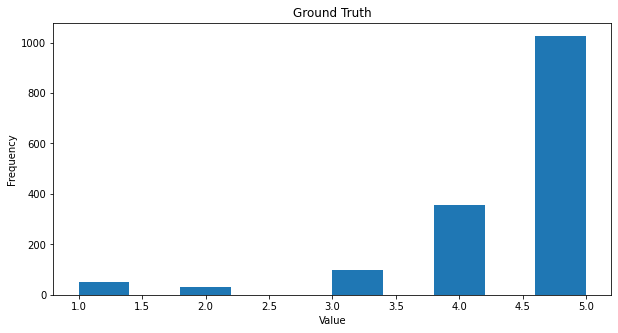

In [ ]:
#what is the distrubution in ground truth scores like?
getHistogram(finaldf,'ratingScore', 'Ground Truth')

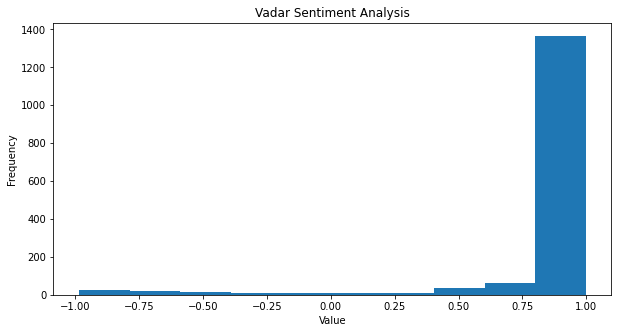

In [ ]:
# what is the distrubtuion in vader scores like?
getHistogram(finaldf, 'vader', 'Vadar Sentiment Analysis')

both score and vader is right skewed, it does not surprise because score nowdays are 5 star, unless it is really bad

In [ ]:
def number_of_review_per_hotel_hist(df,title):
  #fig = plt.figure(figsize=figsize)
  tempdf = df[['hotelName','reviewCol']]
  tempdf = tempdf.groupby('hotelName').agg({'reviewCol':'count'})
  x = tempdf.index.values
  y = tempdf[['reviewCol']]
  tempdf.plot(kind='bar')
  plt.title(title)
  plt.xlabel("hotel name")
  plt.ylabel("review count")
  plt.show()

  return tempdf

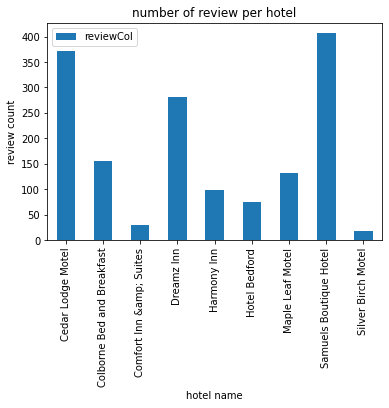

,reviewCol
hotelName,
Cedar Lodge Motel,371
Colborne Bed and Breakfast,156
Comfort Inn &amp; Suites,29
Dreamz Inn,281
Harmony Inn,98
Hotel Bedford,74
Maple Leaf Motel,131
Samuels Boutique Hotel,407
Silver Birch Motel,17


In [ ]:
number_of_review_per_hotel_hist(finaldf,'number of review per hotel')

hotel with least coments are hotel with lowest avg rating and vader score

b)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


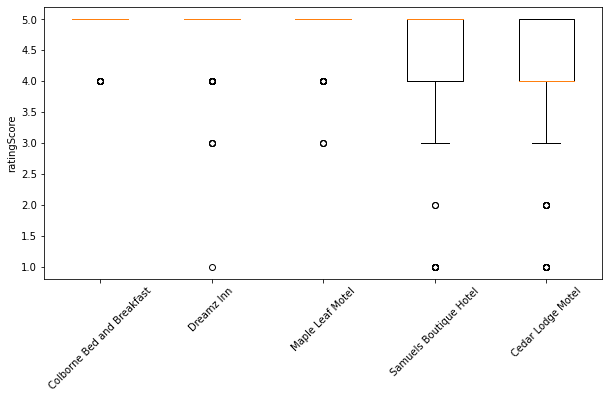

In [ ]:
# how do the ratings compare for 5 hotels?
five_hotels = ['Colborne Bed and Breakfast','Dreamz Inn','Maple Leaf Motel','Samuels Boutique Hotel','Cedar Lodge Motel']

hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), five_hotels,rotation=45)
plt.ylabel('ratingScore')
plt.show()

In [ ]:
for i in hotel_list:
    print([i.mean(),i.var()])

[4.92948717948718, 0.06596360628618693]
[4.797153024911032, 0.23370615149974583]
[4.793893129770993, 0.21103934233705224]
[4.606879606879607, 0.6726619140412243]
[4.277628032345014, 0.8443359801850367]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


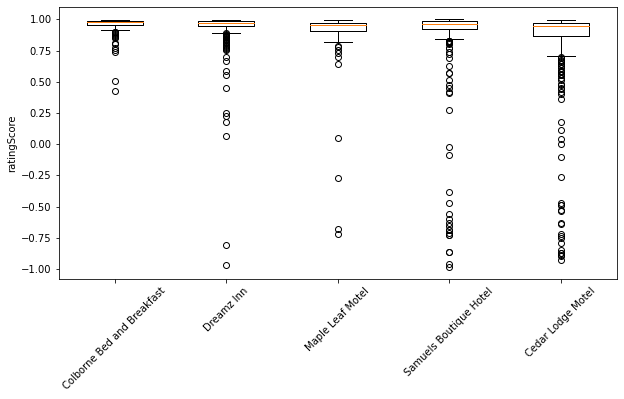

In [ ]:
# how do the ratings compare for 5 hotels?
five_hotels = ['Colborne Bed and Breakfast','Dreamz Inn','Maple Leaf Motel','Samuels Boutique Hotel','Cedar Lodge Motel']

hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['vader']
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), five_hotels,rotation=45)
plt.ylabel('ratingScore')
plt.show()

In [ ]:
for i in hotel_list:
    print([i.mean(),i.var()])

[0.957575, 0.005162557887096774]
[0.9273551601423486, 0.03660965476792069]
[0.890759541984733, 0.06015906488901937]
[0.8757916461916461, 0.10823141485615036]
[0.8148633423180593, 0.13959160622015007]


box plot b/c show max, min, median, 25 and 75 percentile, and outlier

c)

> Indented block
high groud rating usually mean high vadar score


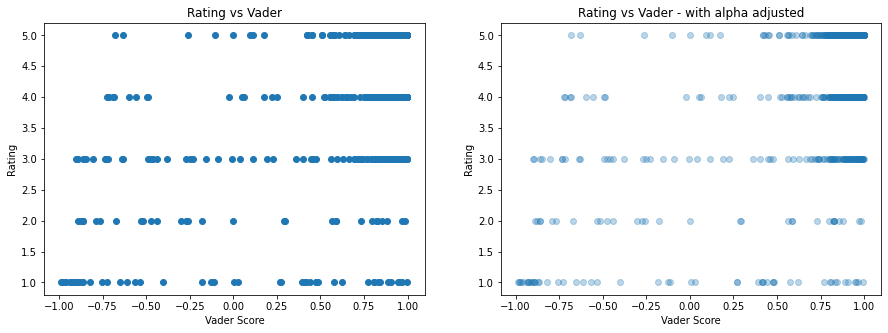

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
vader_scores = finaldf['vader'].values
ax[0].plot(vader_scores, rating_scores,"o")
ax[1].plot(vader_scores, rating_scores,"o", alpha=0.3)

ax[0].set_title('Rating vs Vader')
ax[1].set_title('Rating vs Vader - with alpha adjusted')

for _ax in ax:
  _ax.set_ylabel('Rating')
  _ax.set_xlabel('Vader Score')

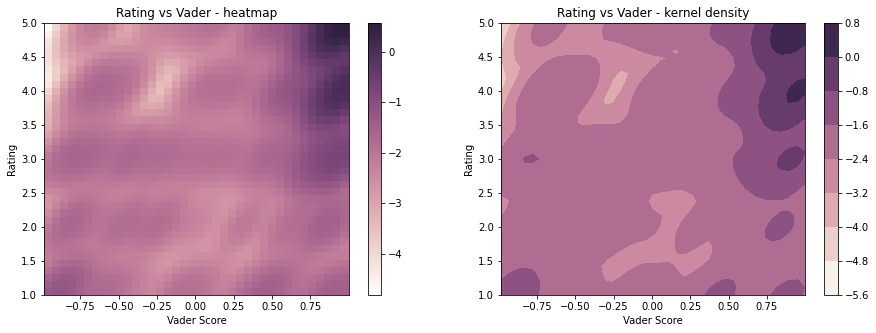

In [ ]:
k = gaussian_kde(np.vstack([vader_scores, rating_scores]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(vader_scores.min(), vader_scores.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs Vader - heatmap')
ax2.set_title('Rating vs Vader - kernel density');

b) 
1. lower rating review tends to have higher average review length
2. high vadar score has higher review length

In [ ]:
def scatter(x,y,x_label,y_label):
    fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=False,sharey=False)
    ax.plot(x, y,"o")
    # ax[1].plot(vader_scores, rating_scores,"o", alpha=0.3)

    ax.set_title(x_label +' vs ' + y_label)
    # ax[1].set_title('Rating vs Vader - with alpha adjusted')

    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
def heatmap(x,y,x_label, y_label):
    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


    b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
    b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

    ax1.set_xlim(x.min(), x.max())
    ax1.set_ylim(y.min(), y.max())
    ax2.set_xlim(x.min(), x.max())
    ax2.set_ylim(y.min(), y.max())

    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)

    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)

    fig.colorbar(b1, ax=ax1)
    fig.colorbar(b2, ax=ax2)

    ax1.set_title(x_label +' vs ' + y_label)
    ax2.set_title(x_label +' vs ' + y_label + ' kernel density');

In [ ]:
review_lenth = np.array([len(x) for x in finaldf['reviewCol']])


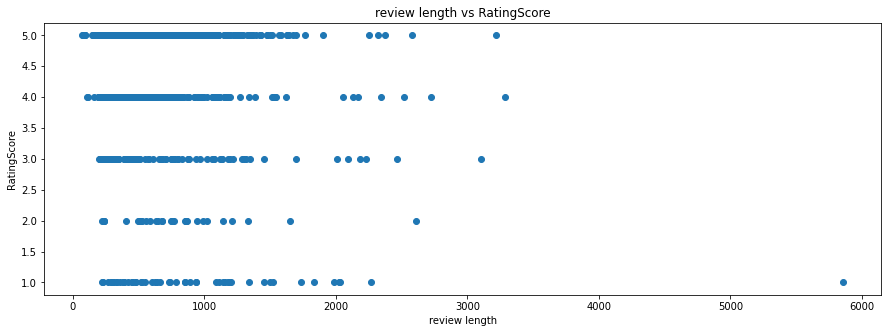

In [ ]:
scatter(review_lenth,rating_scores,'review length','RatingScore')

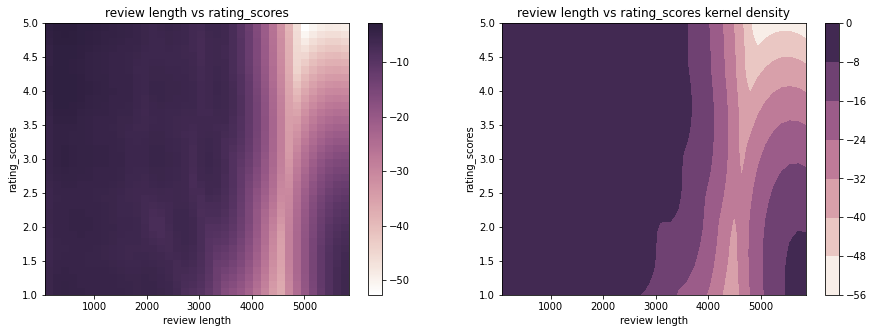

In [ ]:
heatmap(review_lenth,rating_scores,x_label = 'review length',y_label = 'rating_scores')

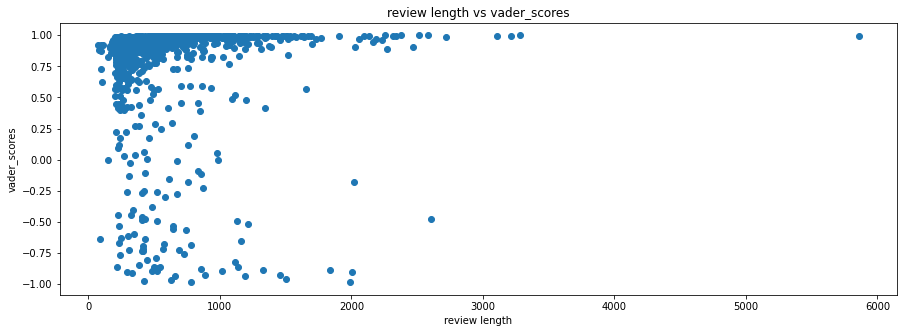

In [ ]:
scatter(review_lenth,vader_scores,'review length','vader_scores')

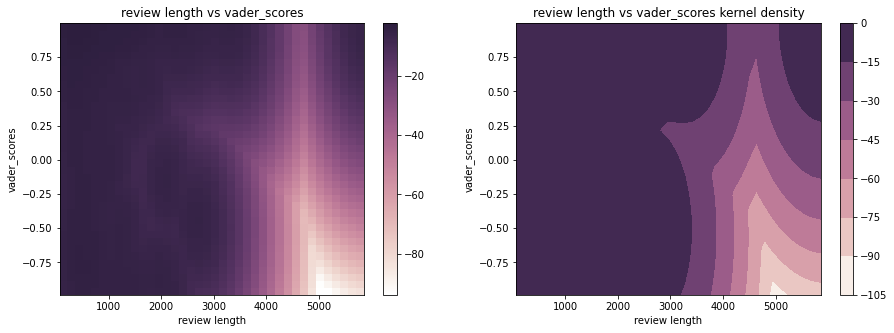

In [ ]:
heatmap(review_lenth,vader_scores,x_label = 'review length',y_label = 'vader_scores')

c) Both plots show similar patten and distribution.
The high rating and low rating hotels do not have many reviews. while the medium rating hotels have more reviews. This may be because these hotels are fairly newer than the medium rating hotels so there might not be enough visitors. Also this makes sense since there might be not enough visitors and reviews so their ratings are not as representitive as the meduim rating hotels.

In [ ]:
review_num = avg_rating_df['n_reviews']
avg_ratingscore = avg_rating_df['AverageRatingScore']
avg_vaderscore = avg_rating_df['AverageVader']

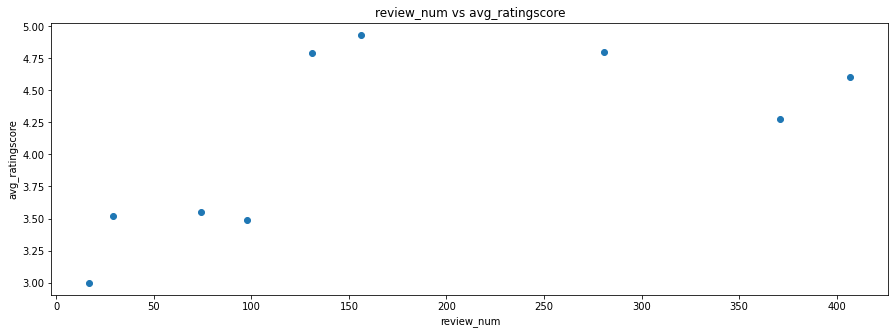

In [ ]:
scatter(review_num,avg_ratingscore,'review_num','avg_ratingscore')

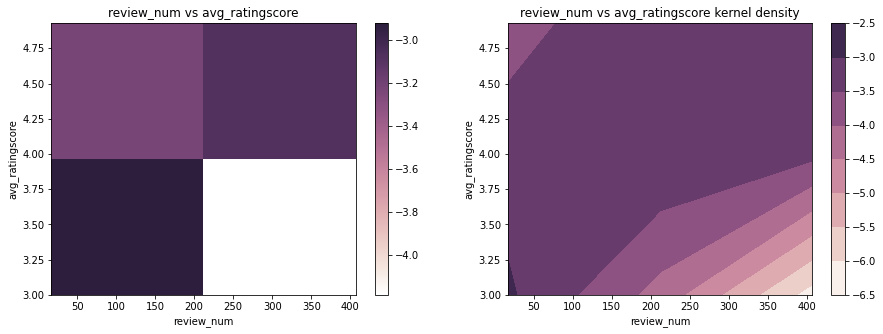

In [ ]:
heatmap(review_num,avg_ratingscore,x_label = 'review_num',y_label = 'avg_ratingscore')

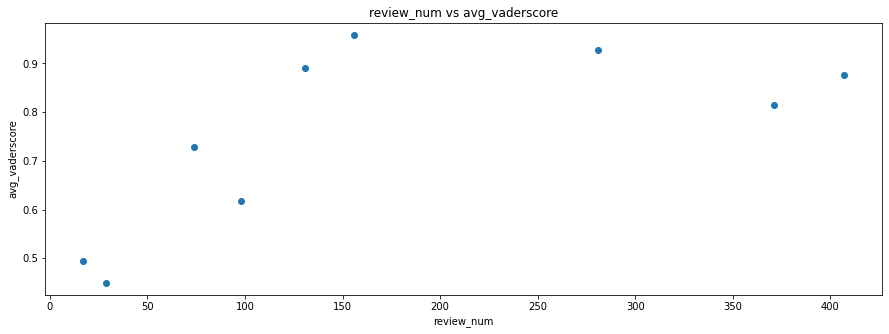

In [ ]:
scatter(review_num,avg_vaderscore,'review_num','avg_vaderscore')

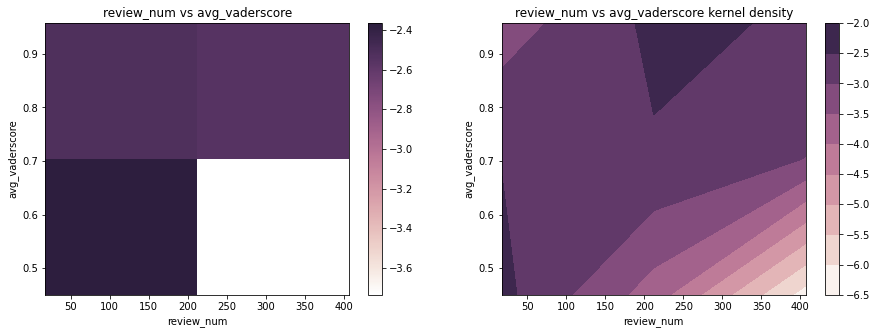

In [ ]:
heatmap(review_num,avg_vaderscore,x_label = 'review_num',y_label = 'avg_vaderscore')

d) stay waya from that furthest one, because summer has a lot of bugs

In [ ]:
def make_address(row):
  # individual columns need to be combined
  return row['Address']+", "+row['city']+", "+row['Province']

In [ ]:
hotelDf

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,timeStamp,Address,city,Province,ZipCode
0,C:\Users\zhang\Documents\ds assignment\assignm...,Cedar Lodge Motel,"""Nice place located downtown and close to all ...",3,negative,"March 29, 2011",157 Huron Rd,"('Goderich',)",Ontario,N7A 2Z7
1,C:\Users\zhang\Documents\ds assignment\assignm...,Cedar Lodge Motel,"""I thoroughly enjoy the pool the exercise room...",4,positive,"May 26, 2011",157 Huron Rd,"('Goderich',)",Ontario,N7A 2Z7
2,C:\Users\zhang\Documents\ds assignment\assignm...,Cedar Lodge Motel,"""we really like the price n service ,nice pool...",5,positive,"June 3, 2011",157 Huron Rd,"('Goderich',)",Ontario,N7A 2Z7
3,C:\Users\zhang\Documents\ds assignment\assignm...,Cedar Lodge Motel,"""We have stayed here before. The place was com...",4,positive,"June 6, 2011",157 Huron Rd,"('Goderich',)",Ontario,N7A 2Z7
4,C:\Users\zhang\Documents\ds assignment\assignm...,Cedar Lodge Motel,"""Extremely reasonable price and respectable ro...",4,positive,"July 6, 2011",157 Huron Rd,"('Goderich',)",Ontario,N7A 2Z7
...,...,...,...,...,...,...,...,...,...,...
1559,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""This motel is beautifully maintained, and all...",5,positive,"August 9, 2022",79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8
1560,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""We stayed as couple for a few days. Rooms are...",5,positive,"August 13, 2022",79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8
1561,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""Excellent customer service, spotless clean ro...",5,positive,"September 7, 2022",79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8
1562,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""Lovely, quiet room in a secure inn. The beds...",5,positive,3 weeks ago,79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8


In [ ]:
# Need the location for each hotel in a format the tool can handle

geo_rating_df = avg_rating_df\
                         .join(hotelDf.groupby('hotelName')\
                         .agg({'Address':'max','city':'max','Province':'max','ZipCode':'max'}))
geo_rating_df['formed_address'] = geo_rating_df.apply(make_address , axis=1)
geo_rating_df = geo_rating_df.replace(["72 Colborne St GPS Coordinates 43.7448959 -81.7155497, ('Goderich',), Ontario"],"72 Colborne St, ('Goderich',), Ontario")

geo_rating_df

,AverageVader,AverageRatingScore,n_reviews,Address,city,Province,ZipCode,formed_address
hotelName,,,,,,,,
Cedar Lodge Motel,0.814863,4.277628,371,157 Huron Rd,"('Goderich',)",Ontario,N7A 2Z7,"157 Huron Rd, ('Goderich',), Ontario"
Colborne Bed and Breakfast,0.957575,4.929487,156,72 Colborne St GPS Coordinates 43.7448959 -81....,"('Goderich',)",Ontario,N7A 2V9,"72 Colborne St, ('Goderich',), Ontario"
Comfort Inn &amp; Suites,0.450048,3.517241,29,135 Gibbons St,"('Goderich',)",Ontario,N7A 3J5,"135 Gibbons St, ('Goderich',), Ontario"
Dreamz Inn,0.927355,4.797153,281,79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8,"79271 Bluewater Hwy, ('Goderich',), Ontario"
Harmony Inn,0.616567,3.489796,98,242 Bayfield Rd,"('Goderich',)",Ontario,N7A 3G6,"242 Bayfield Rd, ('Goderich',), Ontario"
Hotel Bedford,0.727686,3.554054,74,92 Courthouse Sq,"('Goderich',)",Ontario,N7A 1M7,"92 Courthouse Sq, ('Goderich',), Ontario"
Maple Leaf Motel,0.890760,4.793893,131,54 Victoria St N,"('Goderich',)",Ontario,N7A 2R8,"54 Victoria St N, ('Goderich',), Ontario"
Samuels Boutique Hotel,0.875792,4.606880,407,34031 Saltford Rd,"('Goderich',)",Ontario,N7A 3Y1,"34031 Saltford Rd, ('Goderich',), Ontario"
Silver Birch Motel,0.493282,3.000000,17,79764 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8,"79764 Bluewater Hwy, ('Goderich',), Ontario"


In [ ]:
geo_rating_df.iloc[1][7]

"72 Colborne St GPS Coordinates 43.7448959 -81.7155497, ('Goderich',), Ontario"

In [ ]:
# 0 - need to give the tool a generic name.
locator = Nominatim(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2 - form the location string
geo_rating_df['location'] = geo_rating_df['formed_address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
geo_rating_df['point'] = geo_rating_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
geo_rating_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(geo_rating_df['point'].tolist(), index=geo_rating_df.index)
geo_rating_df.replace({'latitude': {'Dreamz Inn': 43.6777559015, 'Hotel Bedford': 43.7420868,'Samuels Boutique Hotel':43.7521}})
geo_rating_df.replace({'longitude': {'Dreamz Inn': -81.7062291121, 'Hotel Bedford': -81.7107994,'Samuels Boutique Hotel':-81.6978}})

geo_rating_df

,AverageVader,AverageRatingScore,n_reviews,Address,city,Province,ZipCode,formed_address,location,point,latitude,longitude,altitude
hotelName,,,,,,,,,,,,,
Cedar Lodge Motel,0.814863,4.277628,371,157 Huron Rd,"('Goderich',)",Ontario,N7A 2Z7,"157 Huron Rd, ('Goderich',), Ontario","(157, Huron Road, Goderich, Huron County, Sout...","(43.73887758265539, -81.70198047896002, 0.0)",43.738878,-81.701980,0.0
Colborne Bed and Breakfast,0.957575,4.929487,156,72 Colborne St GPS Coordinates 43.7448959 -81....,"('Goderich',)",Ontario,N7A 2V9,"72 Colborne St, ('Goderich',), Ontario","(72, Colborne Street, Goderich, Huron County, ...","(43.74502587692307, -81.71375754615384, 0.0)",43.745026,-81.713758,0.0
Comfort Inn &amp; Suites,0.450048,3.517241,29,135 Gibbons St,"('Goderich',)",Ontario,N7A 3J5,"135 Gibbons St, ('Goderich',), Ontario","(Comfort Inn & Suites, 135, Gibbons Street, Go...","(43.7387783, -81.7081617, 0.0)",43.738778,-81.708162,0.0
Dreamz Inn,0.927355,4.797153,281,79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8,"79271 Bluewater Hwy, ('Goderich',), Ontario",None,None,NaN,NaN,NaN
Harmony Inn,0.616567,3.489796,98,242 Bayfield Rd,"('Goderich',)",Ontario,N7A 3G6,"242 Bayfield Rd, ('Goderich',), Ontario","(242, Bayfield Road, Goderich, Huron County, S...","(43.73497616, -81.7061172, 0.0)",43.734976,-81.706117,0.0
Hotel Bedford,0.727686,3.554054,74,92 Courthouse Sq,"('Goderich',)",Ontario,N7A 1M7,"92 Courthouse Sq, ('Goderich',), Ontario",None,None,NaN,NaN,NaN
Maple Leaf Motel,0.890760,4.793893,131,54 Victoria St N,"('Goderich',)",Ontario,N7A 2R8,"54 Victoria St N, ('Goderich',), Ontario","(54, Victoria Street North, Goderich, Huron Co...","(43.7450408, -81.7076121, 0.0)",43.745041,-81.707612,0.0
Samuels Boutique Hotel,0.875792,4.606880,407,34031 Saltford Rd,"('Goderich',)",Ontario,N7A 3Y1,"34031 Saltford Rd, ('Goderich',), Ontario",None,None,NaN,NaN,NaN
Silver Birch Motel,0.493282,3.000000,17,79764 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8,"79764 Bluewater Hwy, ('Goderich',), Ontario","(79764, Bluewater Highway, Central Huron, Huro...","(43.71065317837838, -81.70551970675676, 0.0)",43.710653,-81.705520,0.0


In [ ]:
geo_rating_df.at['Colborne Bed and Breakfast','formed_address']

"72 Colborne St GPS Coordinates 43.7448959 -81.7155497, ('Goderich',), Ontario"

In [ ]:
#map1 = folium.Map(
#    location=[43.7428,-81.7139], # <- this will need to be set based on your own hotels
#    tiles='cartodbpositron',
#    zoom_start=12,
#)

#geo_rating_df.dropna().apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], color='#d7191c').add_to(map1), axis=1)

#map1



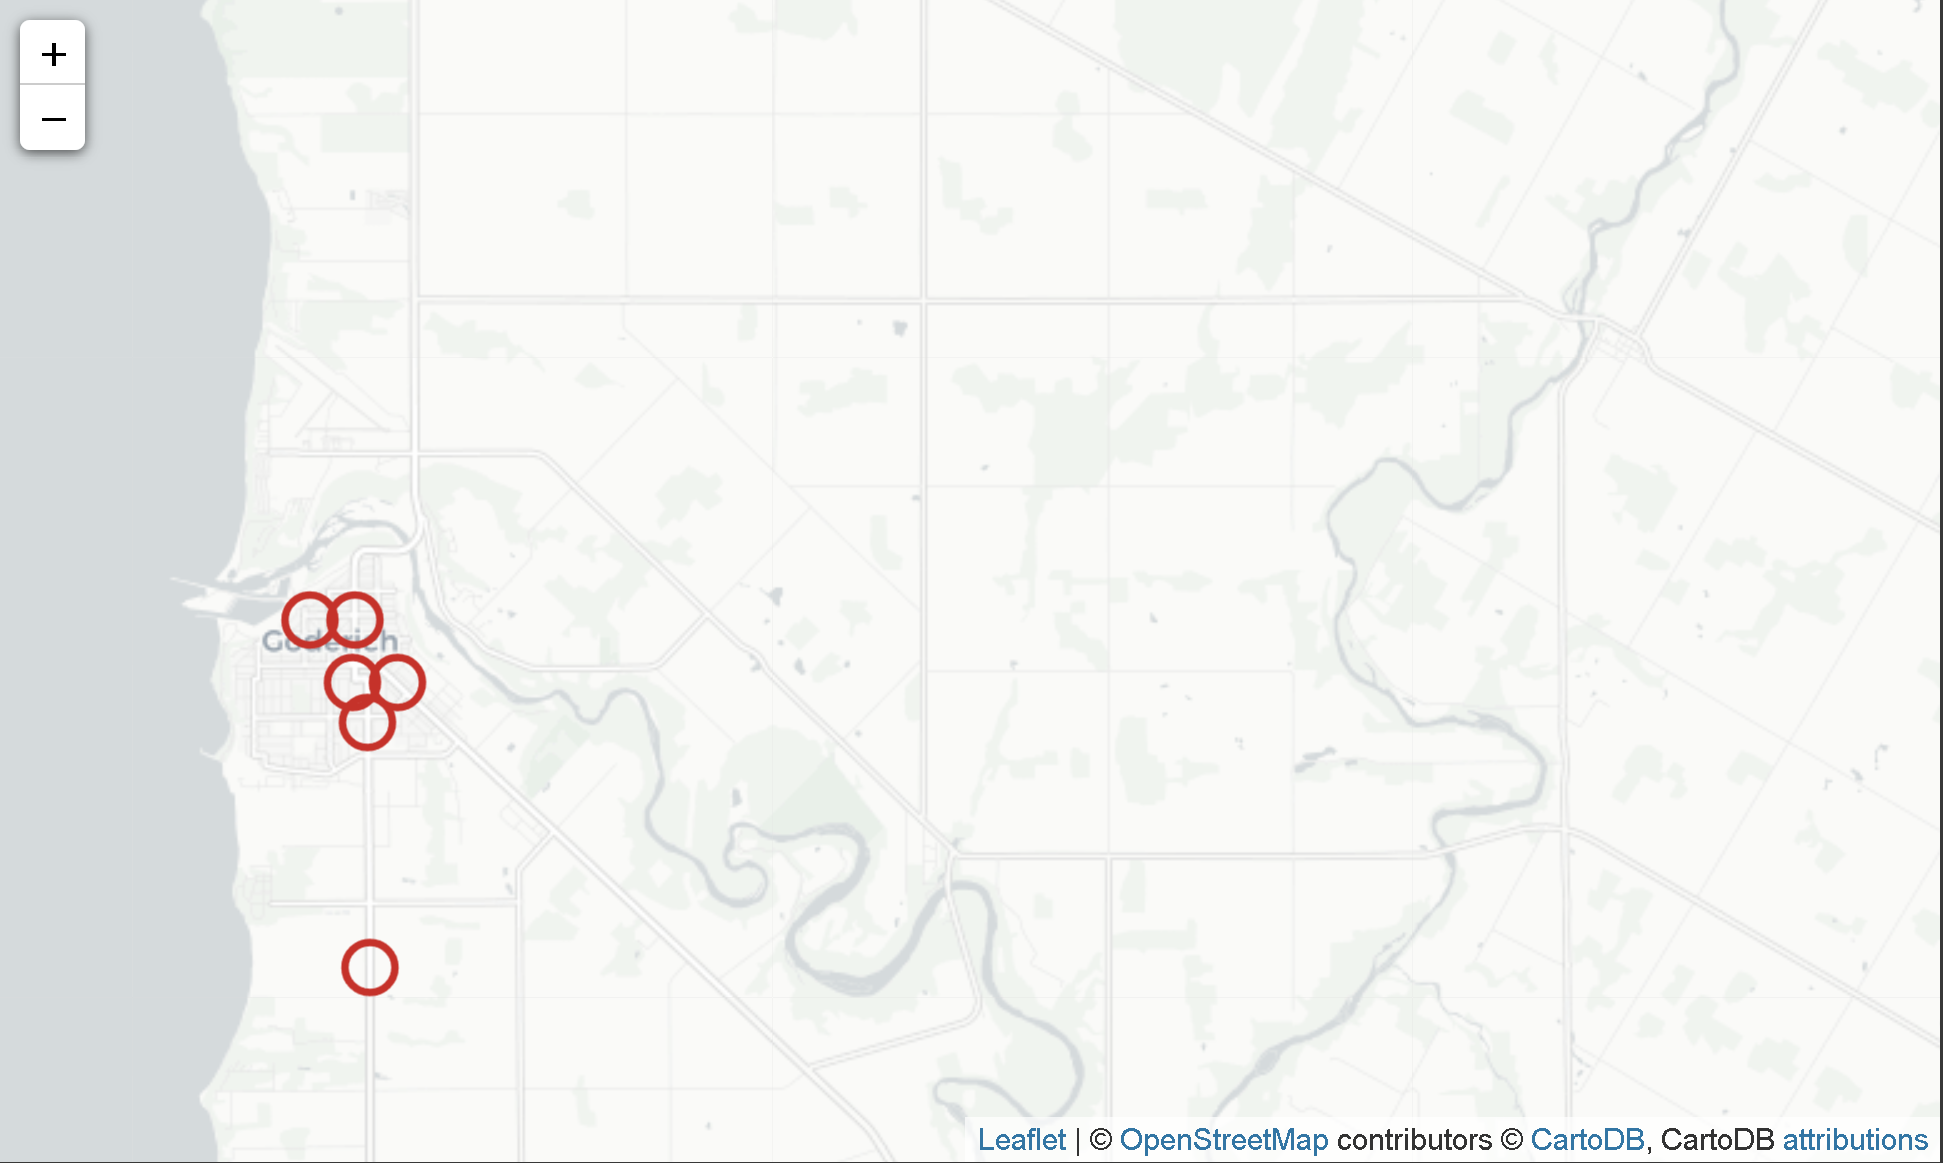

In [ ]:
## folium graphs are best saved as screenshot images to be reloaded into the notebook

from IPython.display import Image
Image('demo.png')

E)  The highly rated hotels ratings are consistant. While the lowly rated hotels ratings are fluctuating so much during different time. And as time goes by, their ratings tend to go down.

people like to go to this place during summer so more review at that time

In [ ]:
avg_rating_df.sort_values('AverageRatingScore',ascending=False)

,AverageVader,AverageRatingScore,n_reviews
hotelName,,,
Colborne Bed and Breakfast,0.957575,4.929487,156
Dreamz Inn,0.927355,4.797153,281
Maple Leaf Motel,0.890760,4.793893,131
Samuels Boutique Hotel,0.875792,4.606880,407
Cedar Lodge Motel,0.814863,4.277628,371
Hotel Bedford,0.727686,3.554054,74
Comfort Inn &amp; Suites,0.450048,3.517241,29
Harmony Inn,0.616567,3.489796,98
Silver Birch Motel,0.493282,3.000000,17


In [ ]:
six_hotels = np.array(['Colborne Bed and Breakfast', 'Dreamz Inn', 'Samuels Boutique Hotel', 'Cedar Lodge Motel','Harmony Inn','Hotel Bedford'])

In [ ]:
hotelDf.tail()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,timeStamp,Address,city,Province,ZipCode
1559,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""This motel is beautifully maintained, and all...",5,positive,"August 9, 2022",79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8
1560,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""We stayed as couple for a few days. Rooms are...",5,positive,"August 13, 2022",79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8
1561,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""Excellent customer service, spotless clean ro...",5,positive,"September 7, 2022",79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8
1562,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""Lovely, quiet room in a secure inn. The beds...",5,positive,3 weeks ago,79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8
1563,C:\Users\zhang\Documents\ds assignment\assignm...,Dreamz Inn,"""My entire family and many friends stayed ther...",5,positive,4 days ago,79271 Bluewater Hwy,"('Goderich',)",Ontario,N7A 3X8


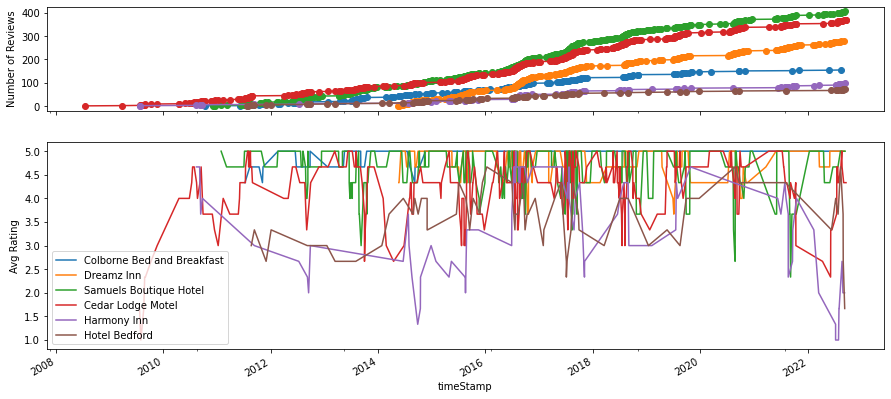

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
hotelDf_drop = hotelDf[~hotelDf.timeStamp.str.contains('|'.join(['ago', 'yesterday']))].reset_index(drop=True)
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels: 
  _df = hotelDf_drop[hotelDf_drop['hotelName']==hotel].set_index('timeStamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['ratingScore'].rolling(3).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

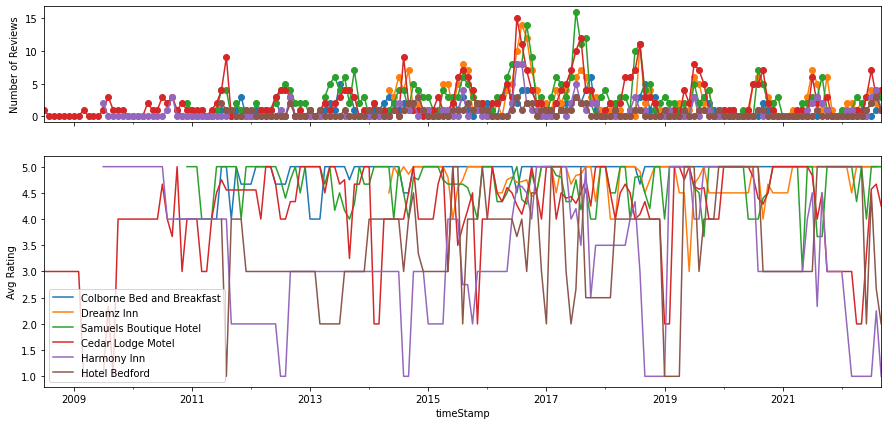

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels: 
  _df = hotelDf_drop[hotelDf_drop['hotelName']==hotel].set_index('timeStamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()